<a href="https://colab.research.google.com/github/Ganasa18/belajar-tensorflow/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with Tensorflow

A classsification is where you try to classify something as one thing or antoher

A few type of classification problems:

* Binary classification
* Multiclass classification
* Multilabel classification


# Createing data to view and fit

In [28]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [29]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [30]:
# Check the labels
# y
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is little hard to understand right now. let's visualize it!

In [31]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [41]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

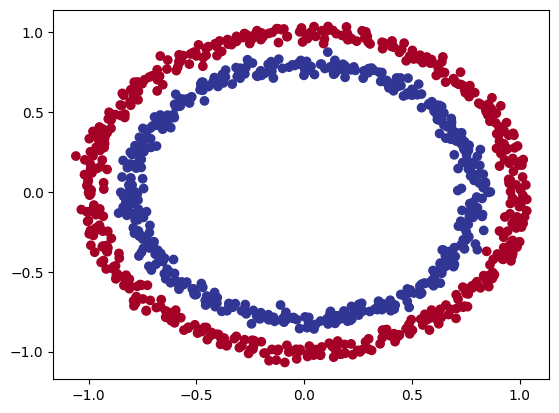

In [32]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [33]:
# Check the shapes of our features and labels

X.shape, y.shape

((1000, 2), (1000,))

In [34]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [35]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the mmodel
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate..


how to evaluate classification model
https://www.ritchieng.com/machine-learning-evaluate-classification-model/

In [36]:
#Import TensorFlow
import tensorflow as tf
tf.__version__

'2.15.0'

In [37]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 5.2779 - accuracy: 0.4800
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.4535 - accuracy: 0.4620
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 1.8375 - accuracy: 0.4940
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7368 - accuracy: 0.5020
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.5020


In [38]:
# Let's try and improve our model by  training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification promben and our model is getting arround ~50% accuracy.. it's performing as i So let's step things up a notch and add an extra layer

In [39]:
# Set the random seed
tf.random.set_seed(42)

# Create Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [40]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932401657104492, 0.5]

In [42]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling the model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer)

In [44]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layer)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add anther layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [45]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6969 - accuracy: 0.5110


[0.6969372034072876, 0.5109999775886536]

To visualize our model's predctions, let's cerate a function `plot_decision_boundary()` this function wills

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make perdictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [49]:
import numpy as np

In [55]:
# model_3.predict(X)
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary cerated by a model predicting on X.\
  This function was inspired by two resources:
  1. https://cs231n.github.io/neural-networks-case-study/
  2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 0].max() + 0.1
  # Meshgrid
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


In [48]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 0].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1337117525463374)

In [50]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

313/313 [==============================] - 1s 2ms/step
doing binary classification


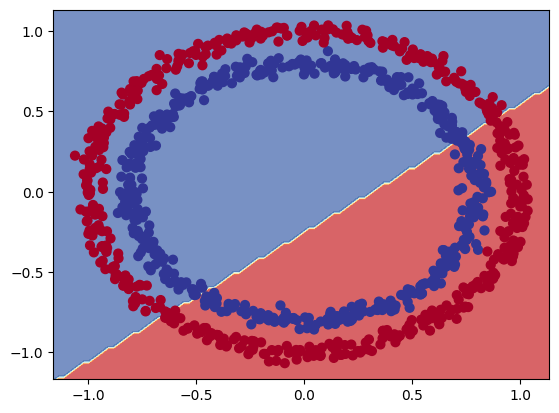

In [54]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [58]:
# Let's see if our model can be used for a regression problem..
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

X_regression, y_regression

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regerssion data
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_7' (type Sequential).
    
    Input 0 of layer "dense_10" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_7' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


Ohw wait... we compiled our model for a binary clssification problem.

But... we're noow owkring on a regression problem, ;et's change the model to suit our data.

In [60]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time woth a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 445.2725 - mae: 445.2725
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 317.0246 - mae: 317.0246
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 193.7295 - mae: 193.7295
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 69.3554 - mae: 69.3554
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 75.8316 - mae: 75.8316
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 93.1815 - mae: 93.1815
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 61.2649 - mae: 61.2649
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 47.3324 - mae: 47.3324
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 48.2412 - mae: 48.2412
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 43.3250 - mae: 43.3250
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 8ms/step


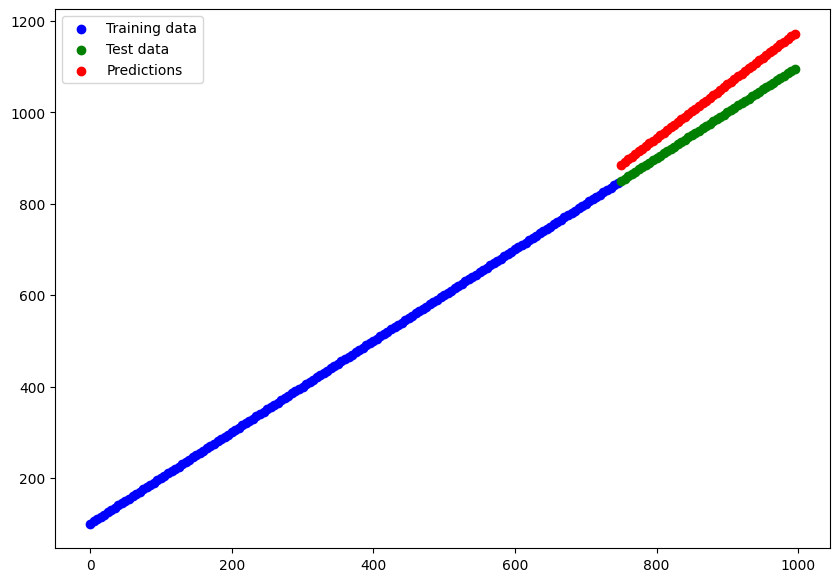

In [61]:
# Make prediciton with our trained model

y_reg_preds = model_3.predict(X_reg_test)
# Plot the model's predection agains our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b",  label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();


In [43]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## The missing piece : Non-linearity

In [80]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fiting the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.3133 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2314 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1141 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0130 - accuracy: 0.4990
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9304 - accuracy: 0.4880
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8324 - accuracy: 0.4780
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6793 - accuracy: 0.4610
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5101 - accuracy: 0.4400
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4030 - accuracy: 0.4230
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3815 - accuracy: 0.4240
Epoch 11/

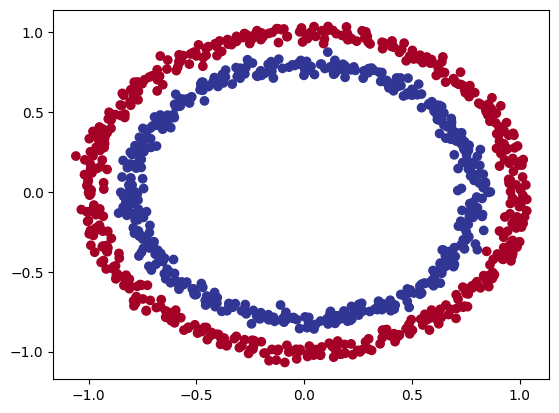

In [68]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
doing binary classification


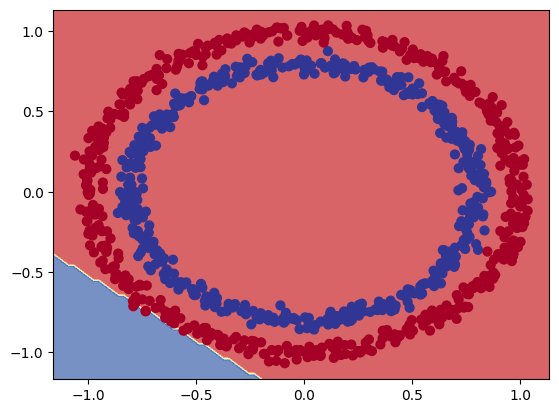

In [81]:
# Check the decision boundary for our latest model
plot_decision_boundary(model_4, X, y)

Let's try build our first neural network with non linear activation function

In [82]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
])

# 2. Compile
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.2483 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2451 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2244 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1982 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1744 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1677 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1473 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1435 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1424 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1413 - accuracy: 0.4840
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


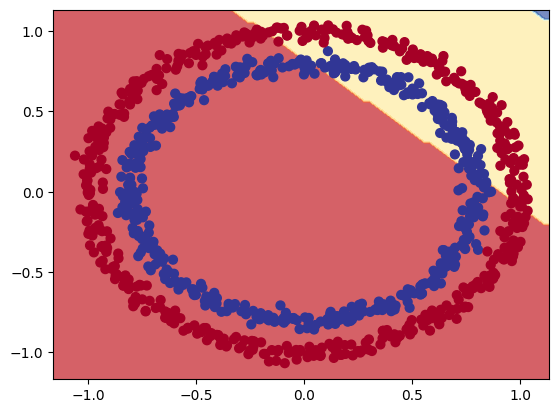

In [83]:
plot_decision_boundary(model_5, X, y)

In [88]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 1.2191 - accuracy: 0.4720
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9654 - accuracy: 0.4150
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8953 - accuracy: 0.4300
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8592 - accuracy: 0.4500
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8355 - accuracy: 0.4480
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8187 - accuracy: 0.4140
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8058 - accuracy: 0.3820
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7962 - accuracy: 0.3710
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7873 - accuracy: 0.3690
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7794 - accuracy: 0.3670
Epoch 11/

In [86]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 6ms/step - loss: 2.5706 - accuracy: 0.1540


[2.5706305503845215, 0.15399999916553497]

313/313 [==============================] - 1s 4ms/step
doing binary classification


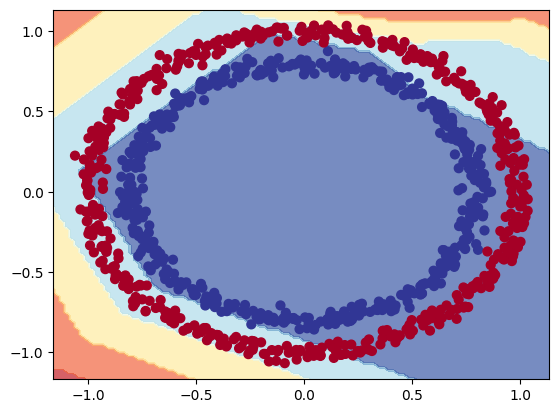

In [89]:
# How do our model prediction look ?
plot_decision_boundary(model_6, X, y)

In [90]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 5ms/step - loss: 0.6918 - accuracy: 0.5030
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6906 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5040
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5080
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6879 - accuracy: 0.5160
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6873 - accuracy: 0.5230
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.5420
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.5400
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6851 - accuracy: 0.5490
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.5370
Epoch 11/

In [91]:
# 4. Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.4790 - accuracy: 0.8240


[0.478965699672699, 0.8240000009536743]

313/313 [==============================] - 1s 2ms/step
doing binary classification


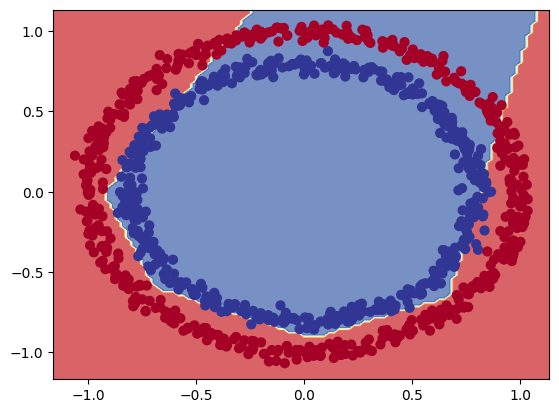

In [92]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

🤔 **Question** What's wrong the predictions we've made ? Are we reallly evaluating our model correctly ? Hint: what data did the model learn on and what data did we predict on ?

🗝️ **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

In [94]:
# Create a toy a tensor (similiar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

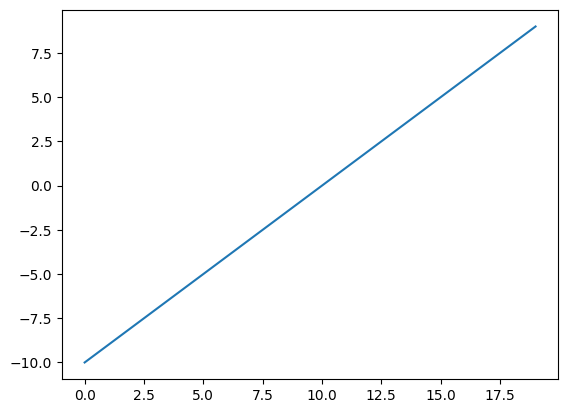

In [95]:
# Visualize our toy tensor
plt.plot(A)

In [96]:
# Let's start by replication sigmoid - sigmoid(x) = 1 / (1 + exp(-x)).
# tf.exponent function
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid funtion on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

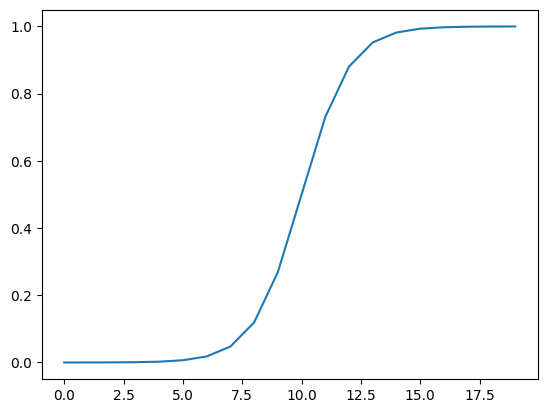

In [97]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))